In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt

import class_helper
%aimport class_helper

import decision_trees_helper
%aimport decision_trees_helper

clh = class_helper.Classification_Helper()
bh  = decision_trees_helper.Boundary_Helper()
lsh = class_helper.LinearSep_Helper()

from IPython.display import Image

# Decision Trees

So far, our models for Classification have attempted to separate classes via *linear* boundaries.

In this module, we will explore a model that faciliates *non-linear* boundaries.

As we will see when we get to Deep Learning, non-linear boundaries are very powerful.

Let's illustrate with an example.

Consider the following dataset for a binary classification task (classes depicted as Red and Green).

There is no linear boundary to completely separate the classes.

In [4]:
X_2c, y_2c = bh.make_iris_2class()

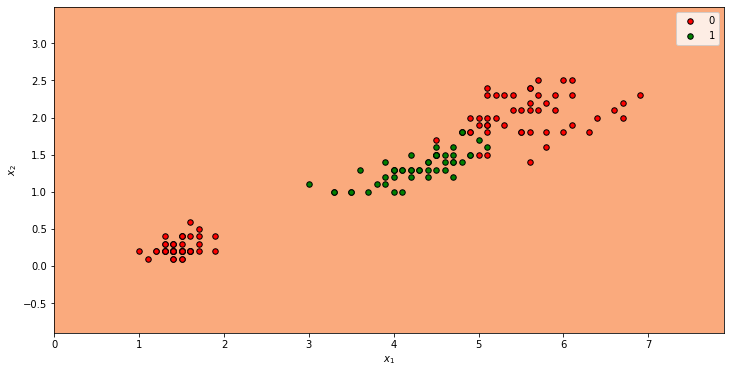

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
_= bh.make_boundary(X_2c, y_2c, depth=1, ax=ax)

But allowing a simple non-linear boundary does a pretty good job.

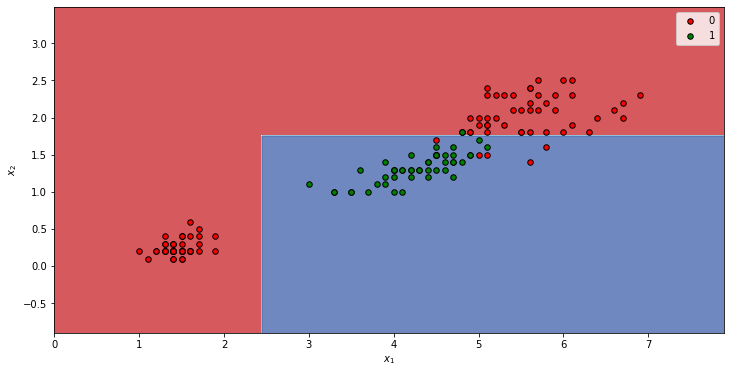

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
bh  = decision_trees_helper.Boundary_Helper()
_= bh.make_boundary(X_2c, y_2c, depth=2, ax=ax)

And an even more complex boundary almost completely separates the classes.
- There are still a few Green points in Red territory and vice-versa

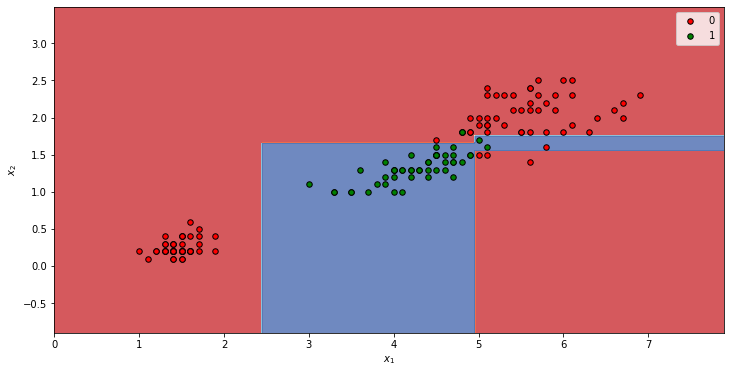

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
_= bh.make_boundary(X_2c, y_2c, depth=4, ax=ax)

Notice that the boundary lines *partition* the values in the domain of each feature
- That is: they divide the features according to whether the value is above/below a threshold.
    
The model that we used creates boundaries via a series of questions, such as
- Is feature $j$ less than $t_{\node{n},j}$ ?

The answers partitions the examples into those with a Positive answer and those with a Negative answer.

We can represent the series of questions as a tree, hence the model is called the *Decision Tree* model.

For example,the partition in the following picture

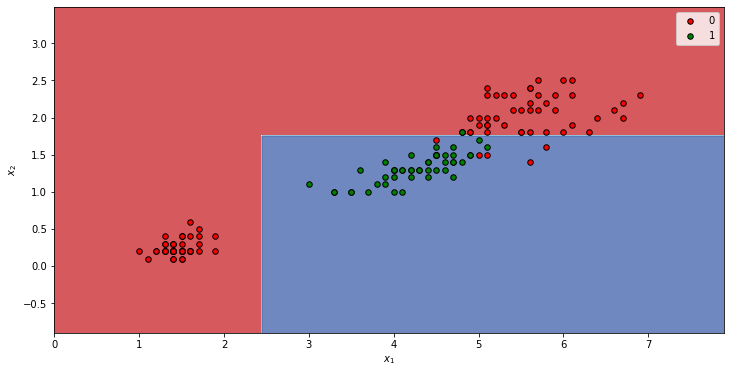

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
bh2  = decision_trees_helper.Boundary_Helper()
_= bh2.make_boundary(X_2c, y_2c, depth=2, ax=ax)

was created by the following tree of questions

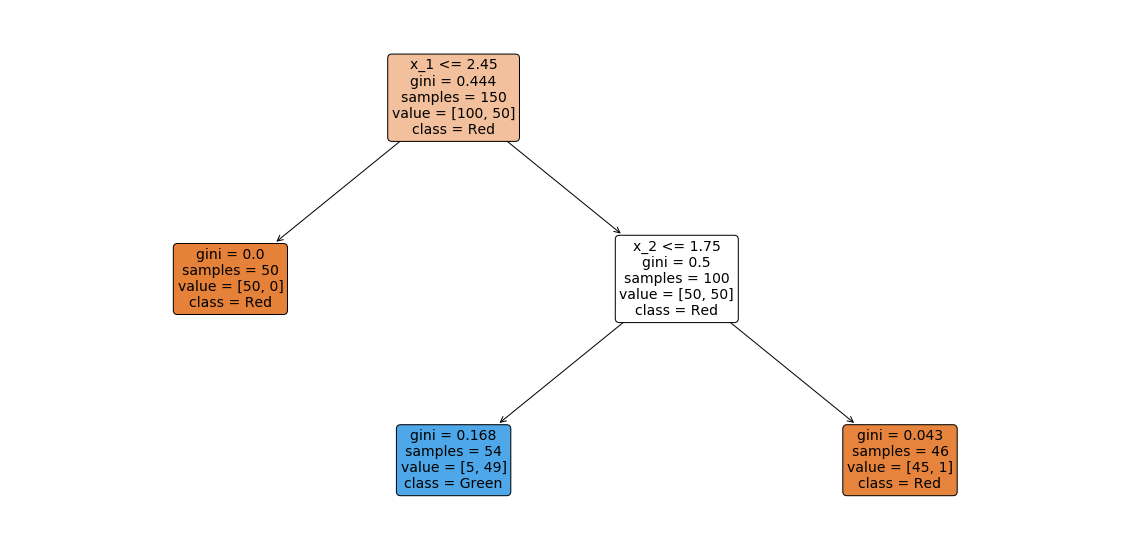

In [9]:
dth = decision_trees_helper.TitanicHelper()

out_file = "/tmp/bh"

feature_names = [ "x_{i:d}".format(i=i) for i in [1,2]]
target_classes = [ "Red", "Green", "Blue"]

ret = dth.make_png(bh2.clf, out_file, feature_names, target_classes)


We will subsequently explain the details of each part of the tree.

For now
- Notice how some questions lead to followup questions
    - This is what creates the non-linear boundary
- Some questions have no followup
    - these "leaves" of the tree are labelled with the Class (i.e., the decision as to the example's class)

One advantage of Decision Trees over Classifiers based on linear boundaries is
the inherent ability to deal with multinomial classification
- No need to create a "One versus All" binary classifier for each class

Here is a partition created by a Decision Tree on three classes

In [10]:
X_dt, y_dt = lsh.load_iris(binary=False, scale=False)

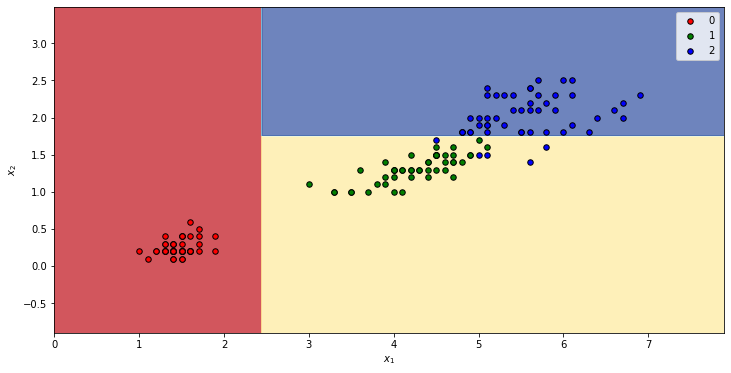

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
_= bh.make_boundary(X_dt, y_dt, depth=2, ax=ax)

The ability to create complex boundaries comes with a potential risk
- overfitting

With enough questions, we can exactly identify each example.

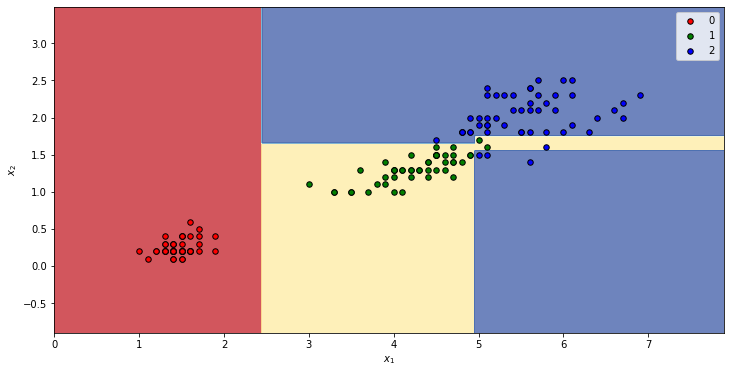

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
_= bh.make_boundary(X_dt, y_dt, depth=4, ax=ax)

In [13]:
print("Done")

Done
